The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs.

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# For randomized data splitting
from sklearn.model_selection import train_test_split
# To build Linear regression model
import statsmodels.api as sm
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
path=("/content/drive/MyDrive/comp-active.xlsx")
df=pd.read_excel(path)

#Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [4]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [ ]:
df.shape

(8192, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [ ]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

#Missing value treatment:
* There are missing values in variables like rchar,wchar.
* They are treated using replace function and are replaced by median values for both the variables.


In [ ]:
df["rchar"]=df["rchar"].replace(np.NaN,df["rchar"].median())
df["wchar"]=df["wchar"].replace(np.NaN,df["wchar"].median())

In [ ]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.00,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.00,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.00,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.00,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.00,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.40,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.20,1.2,2.800,59.56
rchar,8192.0,1.964728e+05,238446.012054,278.0,34860.50,125473.5,265394.750,2526649.00
wchar,8192.0,9.581275e+04,140728.464118,1498.0,22977.75,46619.0,106037.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.00,0.0,2.400,81.44


In [ ]:
df.df=df.drop(["runqsz"],axis=1)

In [ ]:
def univariateAnalysis_numeric(column,nbins):
    plt.figure(figsize=(4,3))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df.df[column], kde=True, color='g');
    plt.show()

Distribution of lread
----------------------------------------------------------------------------


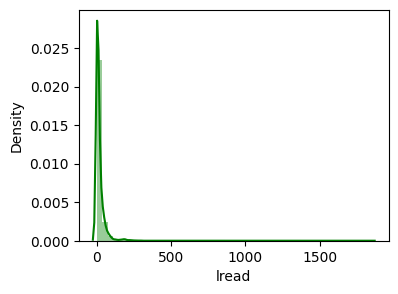

Distribution of lwrite
----------------------------------------------------------------------------


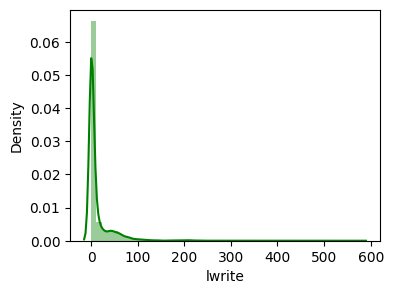

Distribution of scall
----------------------------------------------------------------------------


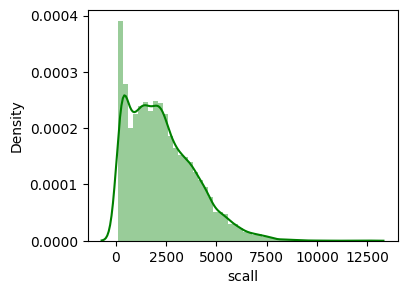

Distribution of sread
----------------------------------------------------------------------------


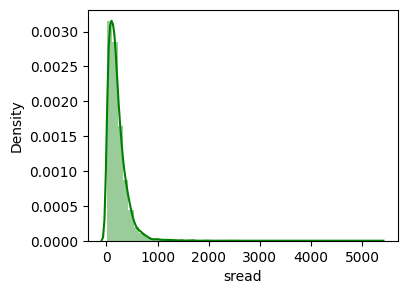

Distribution of swrite
----------------------------------------------------------------------------


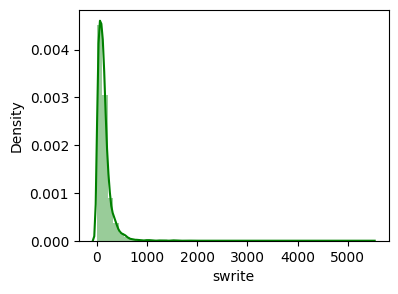

Distribution of fork
----------------------------------------------------------------------------


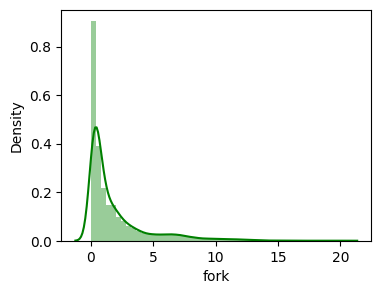

Distribution of exec
----------------------------------------------------------------------------


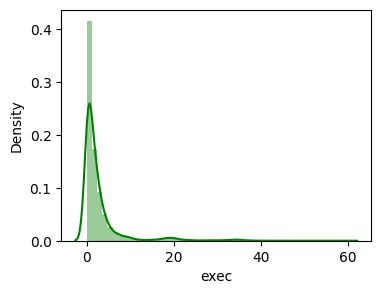

Distribution of rchar
----------------------------------------------------------------------------


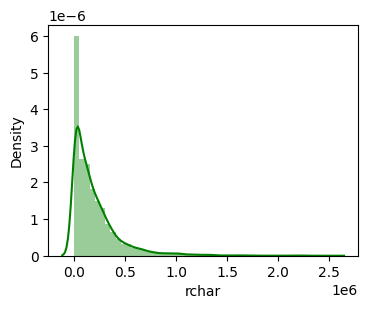

Distribution of wchar
----------------------------------------------------------------------------


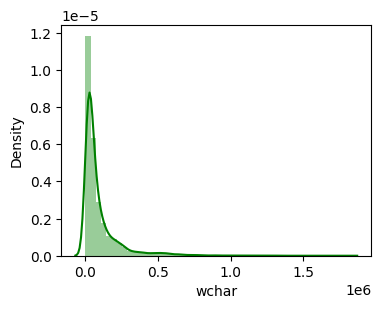

Distribution of pgout
----------------------------------------------------------------------------


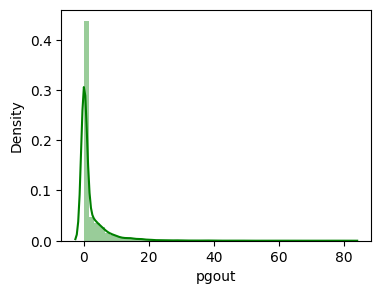

Distribution of ppgout
----------------------------------------------------------------------------


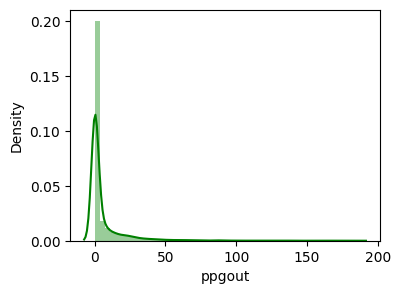

Distribution of pgfree
----------------------------------------------------------------------------


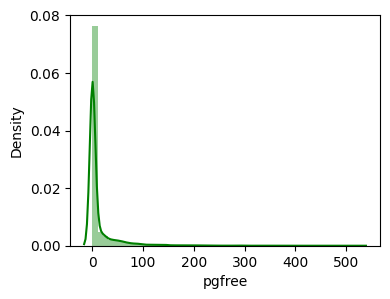

Distribution of pgscan
----------------------------------------------------------------------------


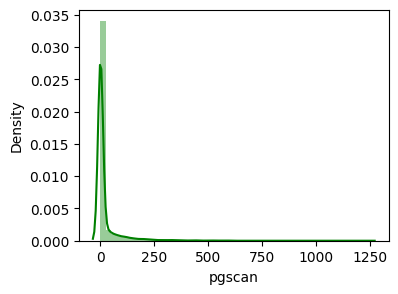

Distribution of atch
----------------------------------------------------------------------------


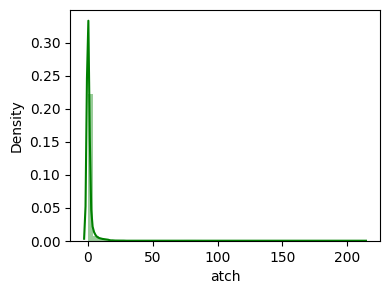

Distribution of pgin
----------------------------------------------------------------------------


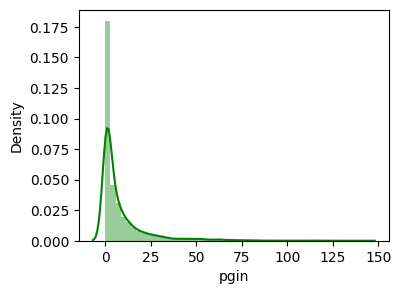

Distribution of ppgin
----------------------------------------------------------------------------


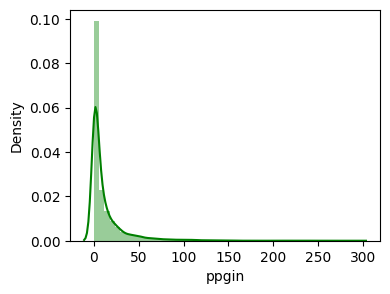

Distribution of pflt
----------------------------------------------------------------------------


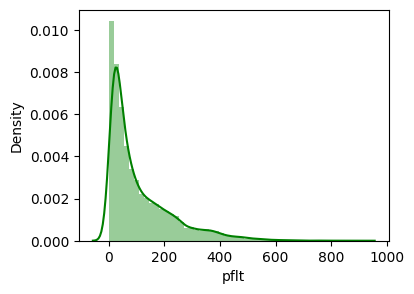

Distribution of vflt
----------------------------------------------------------------------------


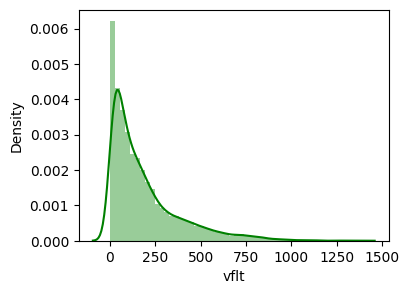

Distribution of freemem
----------------------------------------------------------------------------


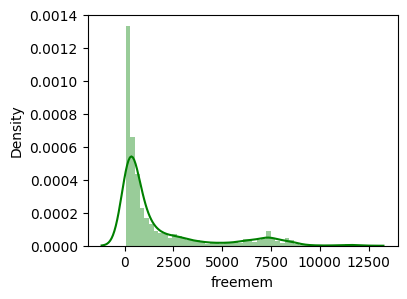

Distribution of freeswap
----------------------------------------------------------------------------


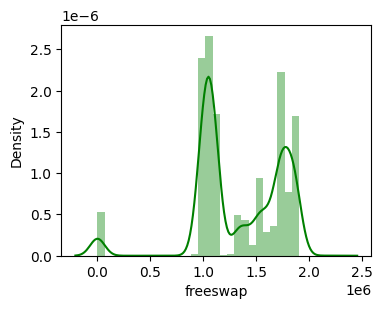

Distribution of usr
----------------------------------------------------------------------------


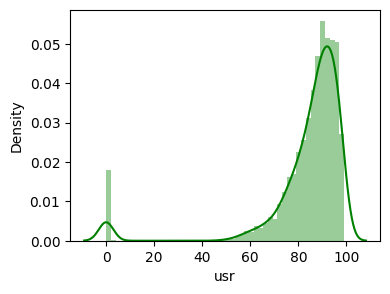

In [ ]:
for x in df.df.columns:
  univariateAnalysis_numeric(x,20)

<AxesSubplot:xlabel='runqsz', ylabel='count'>

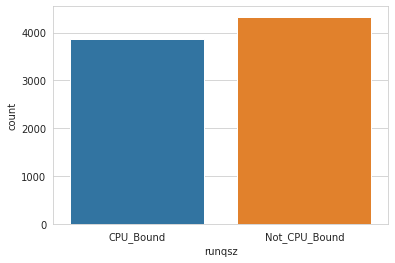

In [ ]:
sns.countplot(data=df,x="runqsz")

#Insights from univariate analysis:
* lread,lwrite,scall,sread,swrite and fork variables are right skewed.
* exec,rchar,wchar,pgout,ppgout,pgfree and pgscan variables are right skewed.
* atch,pgin,ppgin,pflt,vflt and freemem variables are right skewed.
* freeswap and usr variables are left skewed.
* Not CPU bound points are more in data set than CPU bound points.

<AxesSubplot:xlabel='pgout', ylabel='usr'>

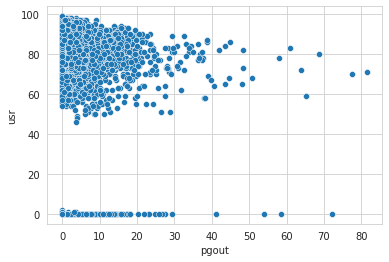

In [ ]:
sns.scatterplot(data=df,x="pgout",y="usr")

<AxesSubplot:xlabel='ppgout', ylabel='usr'>

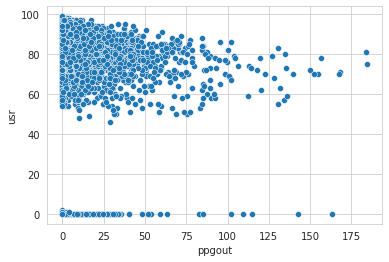

In [ ]:
sns.scatterplot(data=df,x="ppgout",y="usr")

<AxesSubplot:xlabel='fork', ylabel='usr'>

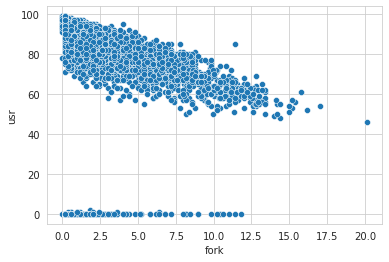

In [ ]:
sns.scatterplot(data=df,x="fork",y="usr")

<AxesSubplot:xlabel='pflt', ylabel='usr'>

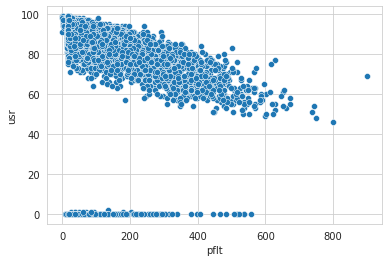

In [ ]:
sns.scatterplot(data=df,x="pflt",y="usr")

<AxesSubplot:xlabel='rchar', ylabel='usr'>

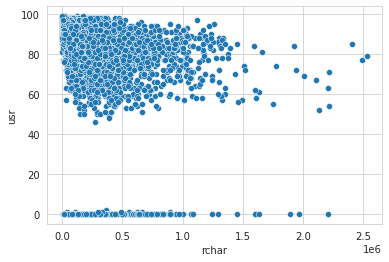

In [ ]:
sns.scatterplot(data=df,x="rchar",y="usr")

<AxesSubplot:xlabel='exec', ylabel='usr'>

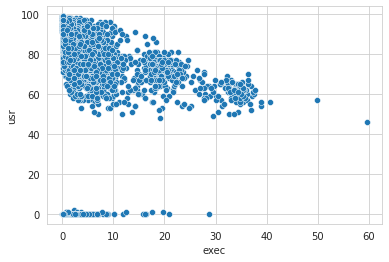

In [ ]:
sns.scatterplot(data=df,x="exec",y="usr")

#Insights from bivariate analysis:
* usr and fork variables are negatively correlated.
* usr and pflt variables are negatively correlated.
* usr and rchar variables are negatively correlated.
* usr and exec are negatively correlated.
* usr and ppgout are slightly correlated with each other.
* usr and pgout variables have no correlation.


<AxesSubplot:>

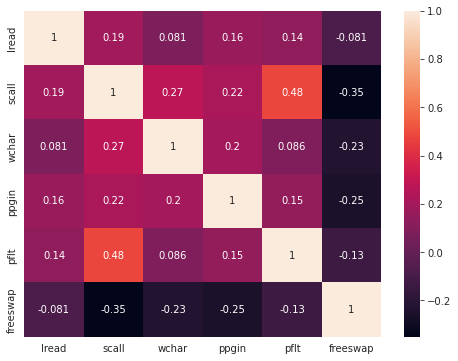

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df[["lread","scall","wchar","ppgin","pflt","freeswap","runqsz"]].corr(),annot=True,cbar=True)

<AxesSubplot:>

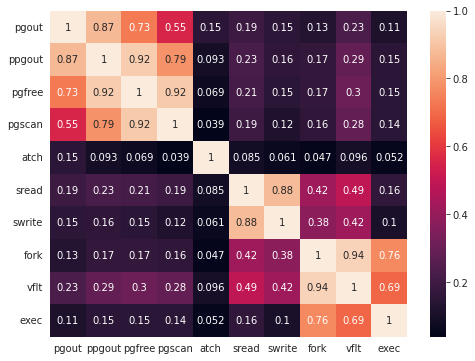

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df[["pgout","ppgout","pgfree","pgscan","atch","sread","swrite","fork","vflt","exec"]].corr(),annot=True,cbar=True)

#Insights from multivariate analysis:
* freeswap and lread, scall, wchar, ppgin, pflt have negative correlation.
* Variables pflt and scall have a correlation of 48%.
* The variables pgscan and pgfree have a correlation of 92%.
* Swrite and sread have 88% correlation, vflt and fork have 94%
correlation.


#Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [ ]:
df.drop(["pgout","ppgout","pgfree","pgscan","atch"],axis=1,inplace=True)

* Variables pgout, ppgout, pgfree, pgscan and atch have more than 50% of the data values as 0, so I am dropping the variables from the data set.


In [ ]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,125473.5,31950.0,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,125473.5,8670.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,125473.5,12185.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [ ]:
df_new=pd.get_dummies(df,columns=["runqsz"],drop_first=True)
df_new.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,1.6,2.6,16.00,26.40,4670,1730946,95,0
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,15.63,16.83,7278,1869002,97,1
2,15,3,2162,159,119,2.0,2.4,125473.5,31950.0,6.0,9.4,150.20,220.20,702,1021237,87,1
3,0,0,160,12,16,0.2,0.2,125473.5,8670.0,0.2,0.2,15.60,16.80,7248,1863704,98,1
4,5,1,330,39,38,0.4,0.4,125473.5,12185.0,1.0,1.2,37.80,47.60,633,1760253,90,1


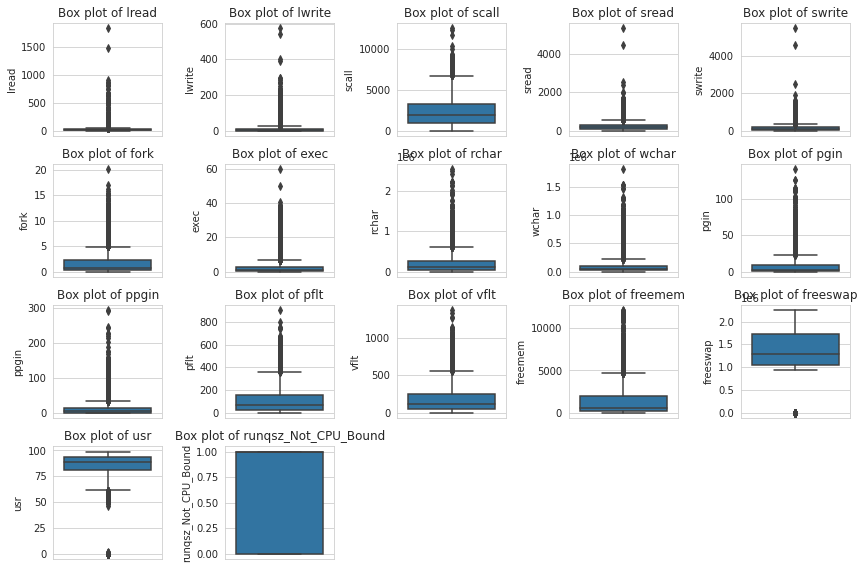

In [ ]:
plt.figure(figsize=(12,8))
feature_list=df_new.columns
for i in range(len(feature_list)):
  plt.subplot(4,5,i+1)
  sns.boxplot(y=df_new[feature_list[i]],data=df_new)
  plt.title("Box plot of {}".format(feature_list[i]))
  plt.tight_layout()

In [ ]:
def treat_outlier(x):
  q25=np.percentile(x,25)
  q75=np.percentile(x,75)
  iqr=q75-q25
  lower_range=q25-(1.5*iqr)
  upper_range=q75+(1.5*iqr)
  return lower_range,upper_range


In [ ]:
for i in feature_list:
    LL, UL = treat_outlier(df_new[i])
    df_new[i] = np.where(df_new[i] > UL, UL, df_new[i])
    df_new[i] = np.where(df_new[i] < LL, LL, df_new[i])

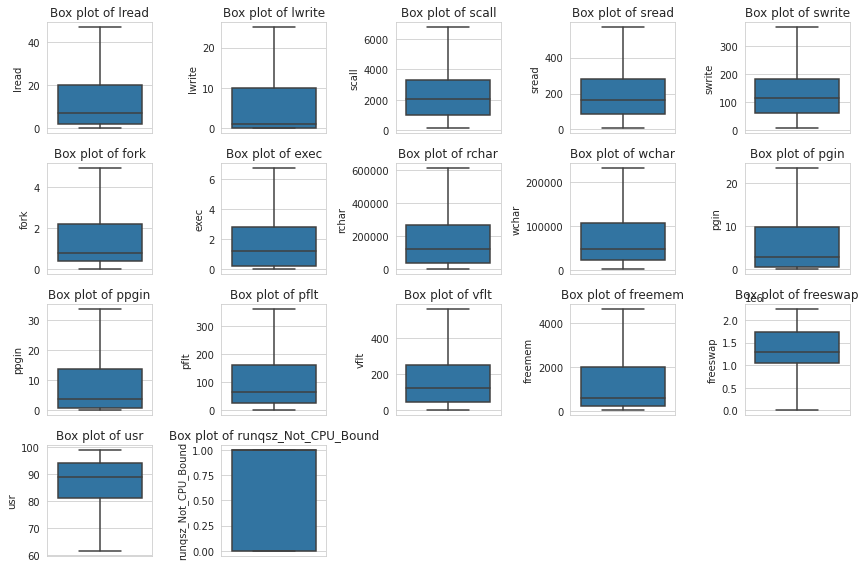

In [ ]:
plt.figure(figsize=(12,8))
feature_list=df_new.columns
for i in range(len(feature_list)):
  plt.subplot(4,5,i+1)
  sns.boxplot(y=df_new[feature_list[i]],data=df_new)
  plt.title("Box plot of {}".format(feature_list[i]))
  plt.tight_layout()

#Outlier treatment:
* 25th quartile and 75th quartile values of all the variables is taken.
* Using them upper range and lower range values are taken and outliers values are found out by using formula for lower_range= q25-(IQR * 1.5) and upper_range=q75+(IQR*1.5).
* If value is greater than Q3 + (1.5 * IQR), we can cap the values to 75th percentile value and if it is lesser than Q1 - (1.5*IQR), we can cap the values to 25th percentile value.


#Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.


In [ ]:
from sklearn.model_selection import train_test_split
X=df_new.drop(["usr"],axis=1)
y=df_new["usr"]

#Label encoding:
* By using get_dummies and drop first, encoded the variable which has string value.
* From sklearn model selection imported train test split, by which the data can be split into train and test data
* Dropped usr variable from the data set and stored remaining data in “X” and usr variable into “y”.
* Train and Test data are split in the ratio of 70:30 and random state as 0.
Added constant to X_train data by using stats model.

In [ ]:
X=sm.add_constant(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
X_train.head()

,const,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
7252,1.0,5.0,3.0,1855.0,94.0,98.0,0.20,0.20,9122.0,27521.0,0.8000,1.00,16.00,28.60,2788.000,1532637.0,0.0
238,1.0,47.0,25.0,2680.0,373.0,289.0,3.19,2.99,276666.0,110753.0,8.3800,14.97,182.24,380.24,77.000,10989.5,0.0
1524,1.0,47.0,25.0,2023.0,193.0,101.0,0.20,0.20,130770.0,18136.0,1.0000,1.20,15.80,19.00,3438.000,1710080.0,0.0
4827,1.0,24.0,25.0,371.0,27.0,55.0,0.20,0.20,791.0,27404.0,0.0000,0.00,15.37,16.77,4659.125,1860192.0,1.0
2165,1.0,47.0,6.0,5040.0,103.0,93.0,1.80,6.70,29913.0,129926.0,23.5125,33.60,141.00,162.20,168.000,1518035.0,0.0


In [ ]:
#Fit Linear model
olsmod=sm.OLS(y_train,X_train)
olsres=olsmod.fit()

In [ ]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1312.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:26:48   Log-Likelihood:                -16774.
No. Observations:                5734   AIC:                         3.358e+04
Df Residuals:                    5717   BIC:                         3.370e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.5150 

* R-square, Adjusted Rsquare value, F-statistic and how variables are contributing to the model (co-ef), standard error of the model, p-value of the variables and what are the values at 25% and 75% (Quartile values)
* By using Variance inflation factor, we can see if independent variables are correlated
* with each other and drop them, if there is any multi collinearity between the
independent variables in the data set, the relationship between dependent variable and each independent variables will not be reflected.
* So while building the model there should not be multi collinearity between the variables.
* We can reduce multicollinearity using Variance Inflation factor and dropping the variables which are causing collinearity.
* We can check which variables are adding value to the model and which values are not adding enough value to the model by dropping them from the model and
checking R squared value and adjusted R squared values.
* R squared value of the model increases if the variable is adding value to the model.
* Whereas Adjusted R square increases when variable is adding value to the variable and decreases when it is not adding enough value.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=variance_inflation_factor=pd.Series(
    [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print(" VIF values: \n\n {} \n".format(vif1))

 VIF values: 

 const                   27.656148
lread                    5.065275
lwrite                   4.100410
scall                    3.040447
sread                    6.540358
swrite                   5.678580
fork                    13.039345
exec                     3.181104
rchar                    2.035495
wchar                    1.576043
pgin                    13.595426
ppgin                   13.552767
pflt                    11.555427
vflt                    15.461937
freemem                  1.711564
freeswap                 1.818426
runqsz_Not_CPU_Bound     1.129338
dtype: float64 



* Variables: vflt, pflt, pgin, ppgin, fork have higher values, which shows multi collinearity.
* Let’s drop the variables one by one and see how the R sqared and Adj R squared values are affecting.
* When the variable is dropped and there is no difference much differecence R square and adjusted R square values we can drop the column and again build the model.
* If it makes the values descrease lets keep the variables for model building.



In [ ]:
X_train1=X_train.drop(["pgin"],axis=1)
olsmod1=sm.OLS(y_train,X_train1)
olsres1=olsmod1.fit()
print(
    "R-squared:",
    np.round(olsres1.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres1.rsquared_adj,3),
)

R-squared: 0.786 
 Adjusted R-squared: 0.785


In [ ]:
X_train2=X_train.drop(["ppgin"],axis=1)
olsmod2=sm.OLS(y_train,X_train2)
olsres2=olsmod2.fit()
print(
    "R-squared:",
    np.round(olsres2.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres2.rsquared_adj,3),
)

R-squared: 0.785 
 Adjusted R-squared: 0.785


In [ ]:
X_train3=X_train.drop(["vflt"],axis=1)
olsmod3=sm.OLS(y_train,X_train3)
olsres3=olsmod3.fit()
print(
    "R-squared:",
    np.round(olsres3.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres3.rsquared_adj,3),
)

R-squared: 0.785 
 Adjusted R-squared: 0.785


In [ ]:
X_train4=X_train.drop(["pflt"],axis=1)
olsmod4=sm.OLS(y_train,X_train4)
olsres4=olsmod4.fit()
print(
    "R-squared:",
    np.round(olsres4.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres4.rsquared_adj,3),
)

R-squared: 0.776 
 Adjusted R-squared: 0.776


In [ ]:
X_train5=X_train.drop(["fork"],axis=1)
olsmod5=sm.OLS(y_train,X_train5)
olsres5=olsmod5.fit()
print(
    "R-squared:",
    np.round(olsres5.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres5.rsquared_adj,3),
)

R-squared: 0.786 
 Adjusted R-squared: 0.785


In [ ]:
X_train=X_train.drop(["pgin"],axis=1)
olsmod1=sm.OLS(y_train,X_train)
olsres1=olsmod1.fit()
print(
    "R-squared:",
    np.round(olsres1.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres1.rsquared_adj,3),
)

R-squared: 0.786 
 Adjusted R-squared: 0.785


* After dropping pgin variable,The R-squared: 0.786
Adjusted R-squared: 0.785 values haven’t dropped.
* After dropping ppgin variable,
R-squared: 0.785 value is dropped
Adjusted R-squared: 0.785 remained unchanged.
* After dropping vflt variable,R-squared: 0.785 value changed
Adjusted R-squared: 0.785 remained unchanged.
* After dropping the fork variable,
R-squared: 0.786
Adjusted R-squared: 0.785 remained same.
* First Lets drop pgin variable, as it not making much difference in R and Adj R square values and build the model:

In [ ]:
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1399.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:27:06   Log-Likelihood:                -16775.
No. Observations:                5734   AIC:                         3.358e+04
Df Residuals:                    5718   BIC:                         3.369e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.5250 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif2=variance_inflation_factor=pd.Series(
    [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print(" VIF values: \n\n {} \n".format(vif2))

 VIF values: 

 const                   27.496217
lread                    5.057965
lwrite                   4.099498
scall                    3.035865
sread                    6.539135
swrite                   5.678526
fork                    13.032476
exec                     3.179710
rchar                    2.027208
wchar                    1.575767
ppgin                    1.581096
pflt                    11.521395
vflt                    15.300543
freemem                  1.711564
freeswap                 1.810357
runqsz_Not_CPU_Bound     1.129259
dtype: float64 



* There is still multi collinearity in the data, as some variables have values of 15, 11 etc.,
* Let’s drop the variables once again and build the model.
* Now let’s drop fork and sread variables one after the other.


In [ ]:
X_train6=X_train.drop(["vflt"],axis=1)
olsmod6=sm.OLS(y_train,X_train6)
olsres6=olsmod6.fit()
print(
    "R-squared:",
    np.round(olsres6.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres6.rsquared_adj,3),
)

R-squared: 0.785 
 Adjusted R-squared: 0.785


In [ ]:
X_train=X_train.drop(["fork"],axis=1)
olsmod7=sm.OLS(y_train,X_train)
olsres7=olsmod7.fit()
print(
    "R-squared:",
    np.round(olsres7.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres7.rsquared_adj,3),
)

R-squared: 0.786 
 Adjusted R-squared: 0.785


* R square value is 0.786 and adj R square value is 0.785, there is no difference after dropping them.
* Let’s build the model again and the summary of the model build:

In [ ]:
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1499.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:36:22   Log-Likelihood:                -16775.
No. Observations:                5734   AIC:                         3.358e+04
Df Residuals:                    5719   BIC:                         3.368e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.5566 

* There is still collinearity in the data.



In [ ]:
X_train8=X_train.drop(["sread"],axis=1)
olsmod8=sm.OLS(y_train,X_train8)
olsres8=olsmod8.fit()
print(
    "R-squared:",
    np.round(olsres8.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres8.rsquared_adj,3),
)

R-squared: 0.786 
 Adjusted R-squared: 0.785


In [ ]:
X_train=X_train.drop(["sread"],axis=1)
olsmod8=sm.OLS(y_train,X_train)
olsres8=olsmod8.fit()
print(
    "R-squared:",
    np.round(olsres8.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres8.rsquared_adj,3),
)

R-squared: 0.786 
 Adjusted R-squared: 0.785


In [ ]:
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1614.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:36:28   Log-Likelihood:                -16776.
No. Observations:                5734   AIC:                         3.358e+04
Df Residuals:                    5720   BIC:                         3.367e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.5785 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif3=variance_inflation_factor=pd.Series(
    [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print(" VIF values: \n\n {} \n".format(vif3))

 VIF values: 

 const                   26.896962
lread                    5.037122
lwrite                   4.069591
scall                    2.681320
swrite                   3.115870
exec                     2.908410
rchar                    1.651620
wchar                    1.562191
ppgin                    1.515144
pflt                     9.927552
vflt                    11.667558
freemem                  1.709979
freeswap                 1.773584
runqsz_Not_CPU_Bound     1.129203
dtype: float64 



Lets drop vflt variable, as it has higher VIF value

In [ ]:
X_train9=X_train.drop(["vflt"],axis=1)
olsmod9=sm.OLS(y_train,X_train9)
olsres9=olsmod8.fit()
print(
    "R-squared:",
    np.round(olsres9.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres9.rsquared_adj,3),
)

R-squared: 0.786 
 Adjusted R-squared: 0.785


In [ ]:
X_train10=X_train.drop(["pflt"],axis=1)
olsmod10=sm.OLS(y_train,X_train10)
olsres10=olsmod10.fit()
print(
    "R-squared:",
    np.round(olsres10.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres10.rsquared_adj,3),
)

R-squared: 0.774 
 Adjusted R-squared: 0.774


In [ ]:
X_train=X_train.drop(["vflt"],axis=1)
olsmod9=sm.OLS(y_train,X_train)
olsres9=olsmod8.fit()
print(
    "R-squared:",
    np.round(olsres9.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres9.rsquared_adj,3),
)

R-squared: 0.786 
 Adjusted R-squared: 0.785


In [ ]:
print(olsres9.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1614.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:36:37   Log-Likelihood:                -16776.
No. Observations:                5734   AIC:                         3.358e+04
Df Residuals:                    5720   BIC:                         3.367e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.5785 

The values of R square, adjusted R square haven’t changed.
Lets check VIF values again for collinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif3=variance_inflation_factor=pd.Series(
    [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print(" VIF values: \n\n {} \n".format(vif3))

 VIF values: 

 const                   26.587579
lread                    5.007007
lwrite                   4.060950
scall                    2.681291
swrite                   3.016582
exec                     2.776349
rchar                    1.635872
wchar                    1.538057
ppgin                    1.393892
pflt                     3.374717
freemem                  1.709936
freeswap                 1.726920
runqsz_Not_CPU_Bound     1.129017
dtype: float64 



* There is still collinearity in the model, so let’s drop the variables and see how the model is performing.
* Let’s drop swrite, exec, lwrite, freemem, rchar variables one after the other after checking the collinearity.
* The VIF values of the variables are close to 1 that means there is less
multicollinearity between the independent variables.


In [ ]:
X_train11=X_train.drop(["lread"],axis=1)
olsmod11=sm.OLS(y_train,X_train11)
olsres11=olsmod11.fit()
print(
    "R-squared:",
    np.round(olsres11.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres11.rsquared_adj,3),
)

R-squared: 0.782 
 Adjusted R-squared: 0.782


In [ ]:
X_train12=X_train.drop(["lwrite"],axis=1)
olsmod12=sm.OLS(y_train,X_train12)
olsres12=olsmod12.fit()
print(
    "R-squared:",
    np.round(olsres12.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres12.rsquared_adj,3),
)

R-squared: 0.784 
 Adjusted R-squared: 0.783


In [ ]:
X_train13=X_train.drop(["swrite"],axis=1)
olsmod13=sm.OLS(y_train,X_train13)
olsres13=olsmod13.fit()
print(
    "R-squared:",
    np.round(olsres13.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres13.rsquared_adj,3),
)

R-squared: 0.784 
 Adjusted R-squared: 0.784


In [ ]:
X_train14=X_train.drop(["scall"],axis=1)
olsmod14=sm.OLS(y_train,X_train14)
olsres14=olsmod14.fit()
print(
    "R-squared:",
    np.round(olsres14.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres14.rsquared_adj,3),
)

R-squared: 0.781 
 Adjusted R-squared: 0.78


In [ ]:
X_train15=X_train.drop(["pflt"],axis=1)
olsmod15=sm.OLS(y_train,X_train15)
olsres15=olsmod15.fit()
print(
    "R-squared:",
    np.round(olsres15.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres15.rsquared_adj,3),
)

R-squared: 0.732 
 Adjusted R-squared: 0.732


In [ ]:
X_train16=X_train.drop(["exec"],axis=1)
olsmod16=sm.OLS(y_train,X_train16)
olsres16=olsmod16.fit()
print(
    "R-squared:",
    np.round(olsres16.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres16.rsquared_adj,3),
)

R-squared: 0.783 
 Adjusted R-squared: 0.783


In [ ]:
X_train=X_train.drop(["swrite"],axis=1)
olsmod13=sm.OLS(y_train,X_train)
olsres13=olsmod13.fit()
print(
    "R-squared:",
    np.round(olsres13.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres13.rsquared_adj,3),
)

R-squared: 0.784 
 Adjusted R-squared: 0.784


* Let’s check the summary of the model after dropping some variables

In [ ]:
print(olsres13.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1887.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:36:52   Log-Likelihood:                -16801.
No. Observations:                5734   AIC:                         3.363e+04
Df Residuals:                    5722   BIC:                         3.371e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.1888 

* The values of R squared and Adjusted R square are reduced to 0.775 but the p-values of variables have come to zero.

In [ ]:
X_train=X_train.drop(["exec"],axis=1)
olsmod17=sm.OLS(y_train,X_train)
olsres17=olsmod17.fit()
print(
    "R-squared:",
    np.round(olsres17.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres17.rsquared_adj,3),
)

R-squared: 0.783 
 Adjusted R-squared: 0.782


In [ ]:
print(olsres17.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     2061.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:27:56   Log-Likelihood:                -16817.
No. Observations:                5734   AIC:                         3.366e+04
Df Residuals:                    5723   BIC:                         3.373e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.0934 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif4=variance_inflation_factor=pd.Series(
    [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print(" VIF values: \n\n {} \n".format(vif4))

 VIF values: 

 const                   25.917848
lread                    4.966714
lwrite                   4.049106
scall                    1.761002
rchar                    1.633919
wchar                    1.421035
ppgin                    1.378917
pflt                     1.720436
freemem                  1.694723
freeswap                 1.719003
runqsz_Not_CPU_Bound     1.128739
dtype: float64 



In [ ]:
X_train=X_train.drop(["lwrite"],axis=1)
olsmod18=sm.OLS(y_train,X_train)
olsres18=olsmod18.fit()
print(
    "R-squared:",
    np.round(olsres18.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres18.rsquared_adj,3),
)

R-squared: 0.781 
 Adjusted R-squared: 0.781


In [ ]:
print(olsres18.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     2274.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:28:03   Log-Likelihood:                -16833.
No. Observations:                5734   AIC:                         3.369e+04
Df Residuals:                    5724   BIC:                         3.375e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.1904 

In [ ]:
X_train=X_train.drop(["freemem"],axis=1)
olsmod19=sm.OLS(y_train,X_train)
olsres19=olsmod19.fit()
print(
    "R-squared:",
    np.round(olsres19.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres19.rsquared_adj,3),
)

R-squared: 0.78 
 Adjusted R-squared: 0.779


In [ ]:
print(olsres19.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     2532.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:28:07   Log-Likelihood:                -16857.
No. Observations:                5734   AIC:                         3.373e+04
Df Residuals:                    5725   BIC:                         3.379e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.5088 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif5=variance_inflation_factor=pd.Series(
    [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print(" VIF values: \n\n {} \n".format(vif5))


 VIF values: 

 const                   25.255850
lread                    1.282166
scall                    1.680999
rchar                    1.627719
wchar                    1.413259
ppgin                    1.331039
pflt                     1.539552
freeswap                 1.260604
runqsz_Not_CPU_Bound     1.117750
dtype: float64 



* Now the VIF values are close to 1, which means very less multi collinearity in the data.

In [ ]:
X_train=X_train.drop(["rchar"],axis=1)
olsmod20=sm.OLS(y_train,X_train)
olsres20=olsmod20.fit()
print(
    "R-squared:",
    np.round(olsres20.rsquared,3),
    "\n Adjusted R-squared:",
    np.round(olsres20.rsquared_adj,3),
)

R-squared: 0.775 
 Adjusted R-squared: 0.775


In [ ]:
print(olsres20.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2825.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:28:21   Log-Likelihood:                -16911.
No. Observations:                5734   AIC:                         3.384e+04
Df Residuals:                    5726   BIC:                         3.389e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.2071 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif6=variance_inflation_factor=pd.Series(
    [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print(" VIF values: \n\n {} \n".format(vif6))

 VIF values: 

 const                   25.026584
lread                    1.282004
scall                    1.677172
wchar                    1.209353
ppgin                    1.277109
pflt                     1.439098
freeswap                 1.258391
runqsz_Not_CPU_Bound     1.104729
dtype: float64 



In [ ]:
X_train.columns

Index(['const', 'lread', 'scall', 'wchar', 'ppgin', 'pflt', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

<AxesSubplot:>

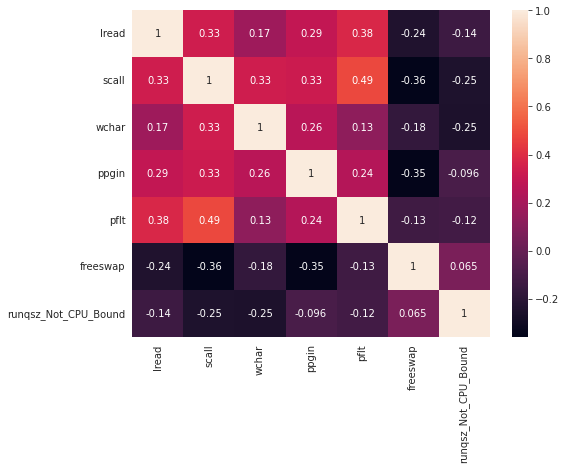

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df_new[["lread","scall","wchar","ppgin","pflt","freeswap","runqsz_Not_CPU_Bound"]].corr(),annot=True,cbar=True)

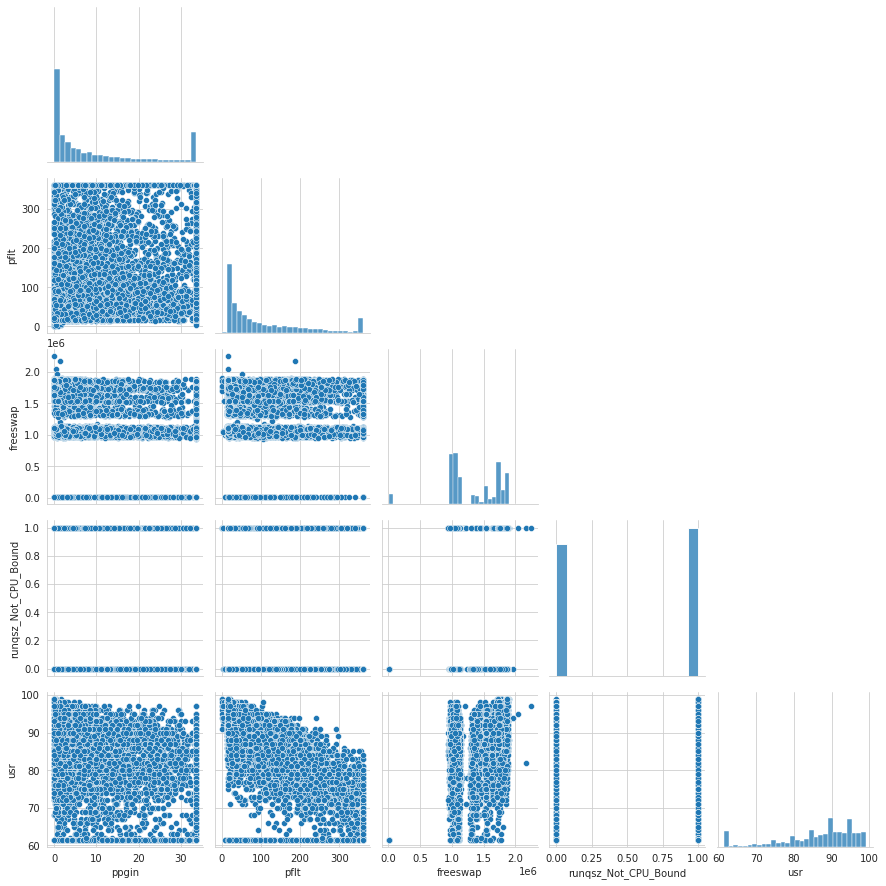

In [ ]:
sns.pairplot(data=df_new[["ppgin","pflt","freeswap","runqsz_Not_CPU_Bound","usr"]],corner=True)

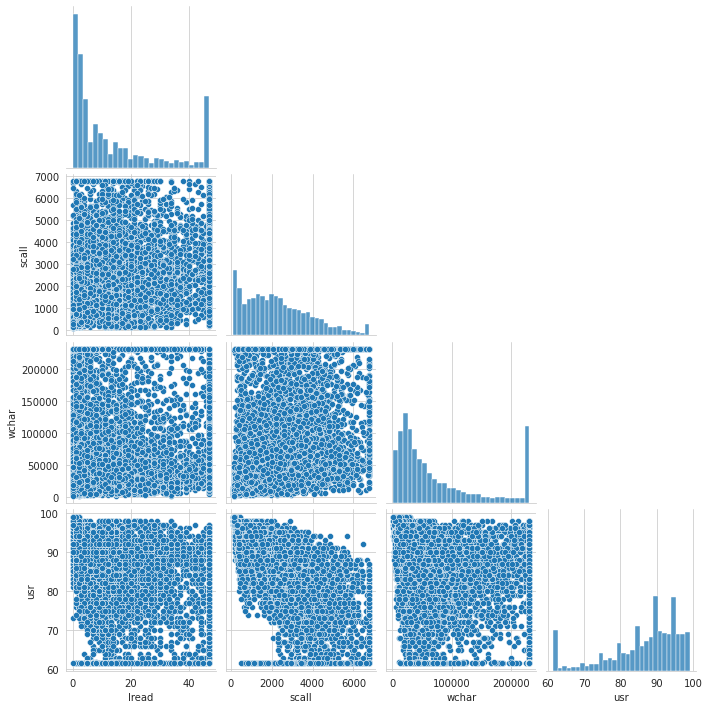

In [ ]:
sns.pairplot(data=df_new[["lread","scall","wchar","usr"]],corner=True)

* Now let’s test the Linear model:
* Lets create a dataframe df_pred by using Actual values of y_train, Fitted values from linear model and Residuals after fitting the model.


In [ ]:
df_pred=pd.DataFrame()
df_pred["Actual Values"]=y_train.values.flatten()
df_pred["Fitted Values"]=olsres20.fittedvalues.values
df_pred["Residuals"]=olsres20.resid.values
df_pred.head()

,Actual Values,Fitted Values,Residuals
0,96.0,93.460574,2.539426
1,61.5,67.661354,-6.161354
2,91.0,93.284698,-2.284698
3,97.0,98.569774,-1.569774
4,75.0,78.789164,-3.789164


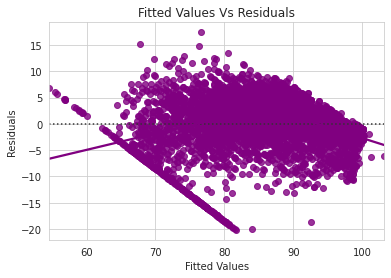

In [ ]:
sns.set_style("whitegrid")
sns.residplot(data=df_pred,x="Fitted Values",y="Residuals",color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values Vs Residuals")
plt.show()

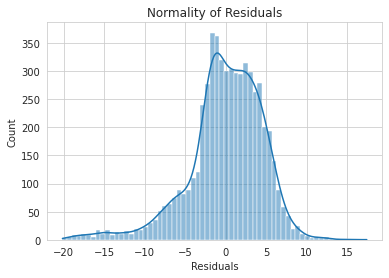

In [ ]:
sns.histplot(df_pred["Residuals"],kde=True)
plt.title("Normality of Residuals")
plt.show()

* There is no much difference in the Root mean square errors and Mean absolute
errors of X_train and X_test data for the linear regression model, but the residuals distribution is not absolutely normal, so lets perform log transformation for scall and pflt variables as they have slight linear relationship with usr.


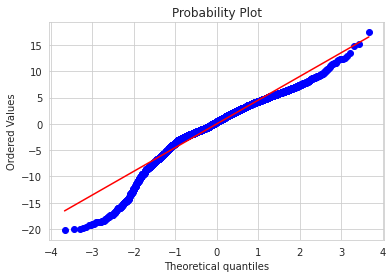

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred["Residuals"],dist="norm",plot=pylab)
plt.show()

In [ ]:
X_train.columns

Index(['const', 'lread', 'scall', 'wchar', 'ppgin', 'pflt', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [ ]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem',
       'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [ ]:
X_test2=X_test.drop(["lwrite","sread","swrite","fork","exec","rchar","pgin","vflt","freemem"],axis=1)

In [ ]:
X_test2.columns

Index(['const', 'lread', 'scall', 'wchar', 'ppgin', 'pflt', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [ ]:
y_pred=olsres20.predict(X_test2)

In [ ]:
rmse1=np.sqrt(mean_squared_error(y_train,df_pred["Fitted Values"]))
rmse1

4.619480281399096

In [ ]:
rmse2=np.sqrt(mean_squared_error(y_test,y_pred))
rmse2

4.657564249265413

In [ ]:
mae1=np.sqrt(mean_absolute_error(y_train,df_pred["Fitted Values"]))
mae1

1.8612585416570617

In [ ]:
mae2=np.sqrt(mean_absolute_error(y_test,y_pred))
mae2

1.8640049379533783

In [ ]:
# we can see the weight column has nonlinear relationship with mpg.We can transform the weight column
#Using log transformation
X_train["pflt_sq"]=np.square(X_train["pflt"])
X_train["scall_sq"]=np.square(X_train["scall"])
#Lets create a model with log transformed data
olsmod21=sm.OLS(y_train,X_train)
olsres21=olsmod21.fit()
print(olsres21.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2393.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:29:29   Log-Likelihood:                -16719.
No. Observations:                5734   AIC:                         3.346e+04
Df Residuals:                    5724   BIC:                         3.352e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   79.2928 

* From the above summary table, R squared value and Adjusted R squared value are 0.790.This is greater than the previous model, which is before transformation.

In [ ]:
df_pred=pd.DataFrame()
df_pred["Actual Values"]=y_train.values.flatten()
df_pred["Fitted Values"]=olsres21.fittedvalues.values
df_pred["Residuals"]=olsres21.resid.values
df_pred.head()

,Actual Values,Fitted Values,Residuals
0,96.0,93.638540,2.361460
1,61.5,68.072060,-6.572060
2,91.0,93.715937,-2.715937
3,97.0,97.468851,-0.468851
4,75.0,78.948251,-3.948251


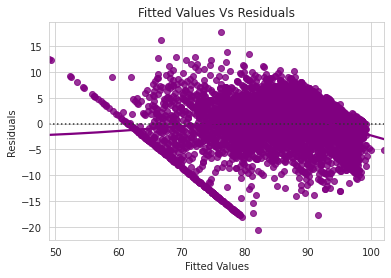

In [ ]:
sns.set_style("whitegrid")
sns.residplot(data=df_pred,x="Fitted Values",y="Residuals",color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values Vs Residuals")
plt.show()

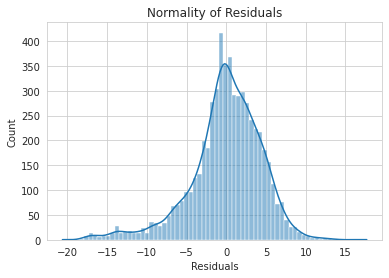

In [ ]:
sns.histplot(df_pred["Residuals"],kde=True)
plt.title("Normality of Residuals")
plt.show()

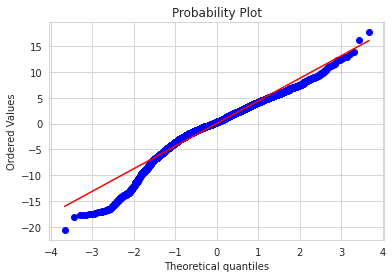

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred["Residuals"],dist="norm",plot=pylab)
plt.show()

In [ ]:
X_train.columns

Index(['const', 'lread', 'scall', 'wchar', 'ppgin', 'pflt', 'freeswap',
       'runqsz_Not_CPU_Bound', 'pflt_sq', 'scall_sq'],
      dtype='object')

In [ ]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem',
       'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [ ]:
X_test2=X_test.drop(["lwrite","sread","swrite","fork","exec","rchar","pgin","vflt","freemem"],axis=1)

In [ ]:
X_test2.columns

Index(['const', 'lread', 'scall', 'wchar', 'ppgin', 'pflt', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [ ]:
X_test2["pflt_sq"]=np.square(X_test2["pflt"])
X_test2["scall_sq"]=np.square(X_test2["scall"])

In [ ]:
y_pred=olsres21.predict(X_test2)

In [ ]:
rmse3=np.sqrt(mean_squared_error(y_train,df_pred["Fitted Values"]))
rmse3

4.467435679982289

In [ ]:
rmse4=np.sqrt(mean_squared_error(y_test,y_pred))
rmse4

4.489476295871791

In [ ]:
mae3=np.sqrt(mean_absolute_error(y_train,df_pred["Fitted Values"]))
mae3

1.817286404344795

In [ ]:
mae4=np.sqrt(mean_absolute_error(y_test,y_pred))
mae4

1.8202514321708174

* The distribution of Residuals is normal after Log transformation and the probability plot of residuals is approximately following a straight line in this model than the one without Log transformation

In [ ]:
#Lets write the equation for linear regression
Equation="usr="
print(Equation,end=" ")
for i in range(len(X_train.columns)):
  if i==0:
    print(olsres21.params[i],"+",end=" ")
  elif i!= len(X_train.columns)-1:
    print(
        olsres21.params[i],
        "* (",
        X_train.columns[i],
        ")",
        "+",
        end=" ",
    )
  else:
    print(olsres21.params[i], "* (", X_train.columns[i],")")

usr= 79.29276284351539 + -0.03990976806508871 * ( lread ) + 0.001170332774140717 * ( scall ) + -1.217445310370803e-05 * ( wchar ) + -0.10687129040519526 * ( ppgin ) + -0.02883765885115008 * ( pflt ) + 9.39358274947603e-06 * ( freeswap ) + 2.061638061729725 * ( runqsz_Not_CPU_Bound ) + -6.257727401287826e-05 * ( pflt_sq ) + -3.206158294967587e-07 * ( scall_sq )


#Inferences:
* Given data set has variables whose more than 50% of the values are 0’s.
* There are many variables which have high collinearity between independent
variables.
* There are many outliers in the data set.
* The variables which have more 0’s as values have been dropped, as they
have less correlation between them and 0’s are more than 50%.
* By using train test split, data have been split into train and test data
* By using sklearn and Stats model Linear regression model has been build.
* Model has multicollinearity between the independent variables and has been
found by using Variance inflation factor (VIF).
* Variables which have more collinearity were dropped one by one after
checking the R squared and adjusted R squared values and after checking
with VIF values.
* After dropping the variables which have much collinearity, VIF values have
come close to 1, which shows no collinearity.
* Log transformation is done to increase the performance of the model build,
which increased the values of R square and adjusted R square to 79%.
* If the Number of system of all types (scall) is increased by 100, then there will 0.001 % increase in the portion of time that CPU runs in user mode.
* Process run queue size has more positive impact on the portion of time that
CPU runs in user mode.
* With increase of 100% increase of Reads between system memory and user
memory there will be 30% decrease in in the portion of time that CPU runs in
user mode

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


(1473, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

80

0

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


(1393, 10)

,Wife_age,No_of_children_born,Husband_Occupation
count,1393.000000,1393.000000,1393.000000
mean,32.530510,3.286432,2.174444
std,8.088188,2.381791,0.854590
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,38.000000,5.000000,3.000000
max,49.000000,16.000000,4.000000


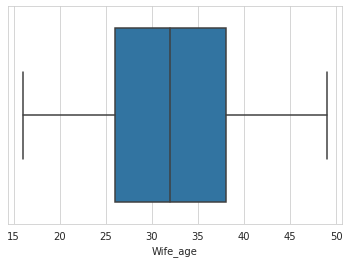

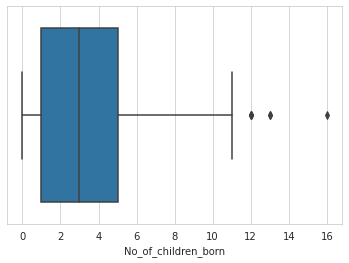

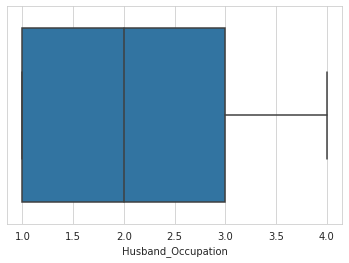

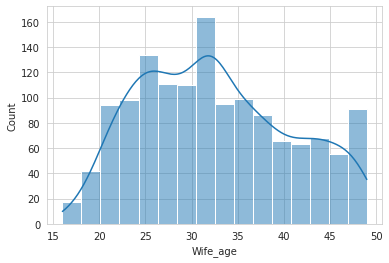

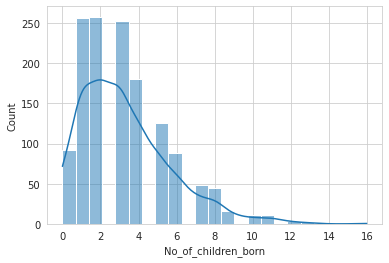

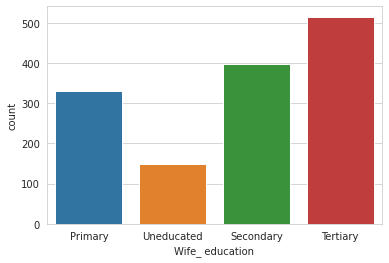

Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64

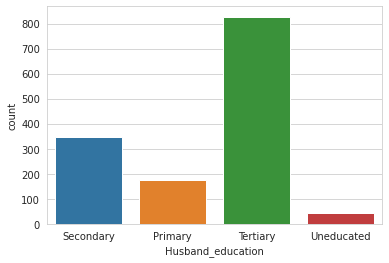

Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64

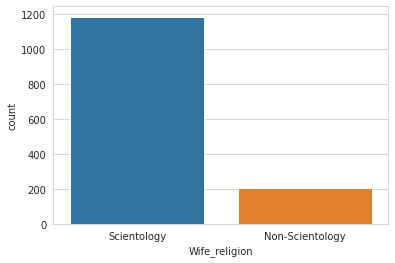

Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64

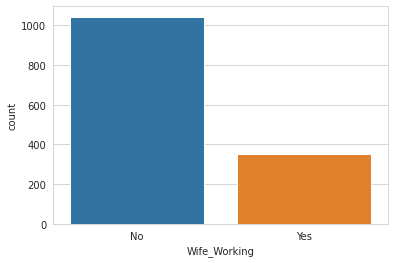

No     1043
Yes     350
Name: Wife_Working, dtype: int64

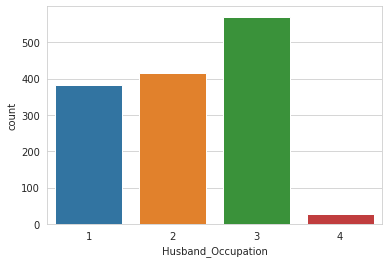

3    570
2    415
1    381
4     27
Name: Husband_Occupation, dtype: int64

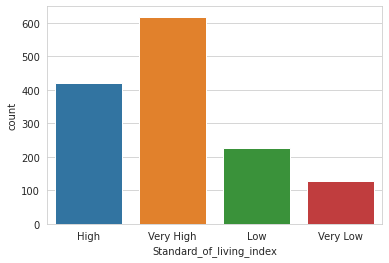

Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64

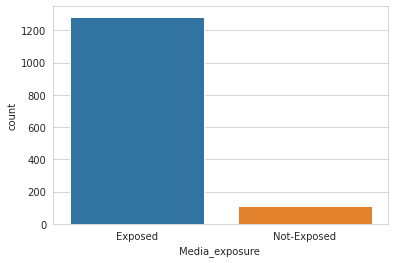

Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64

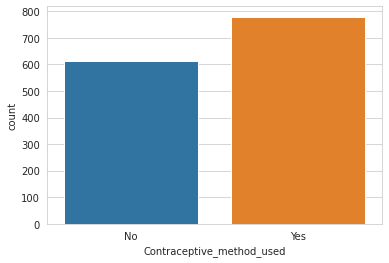

Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64

<AxesSubplot:xlabel='Contraceptive_method_used', ylabel='No_of_children_born'>

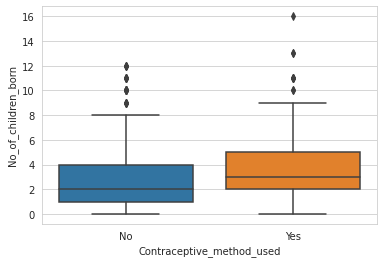

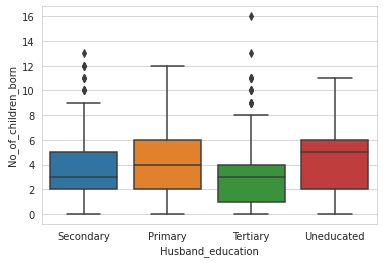

No_of_children_born,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,16.0,All
Husband_education,,,,,,,,,,,,,,,,
Primary,11,25,27,24,19,16,16,10,17,6,1,2,1,0,0,175
Secondary,16,65,62,54,47,32,28,17,10,5,4,3,3,1,0,347
Tertiary,61,163,165,169,111,70,39,19,14,5,4,5,0,1,1,827
Uneducated,4,4,4,6,3,8,5,3,4,0,2,1,0,0,0,44
All,92,257,258,253,180,126,88,49,45,16,11,11,4,2,1,1393


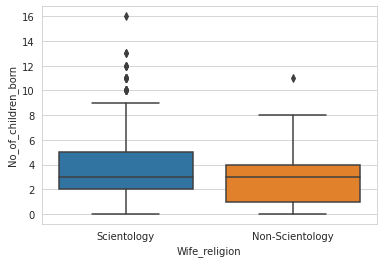

No_of_children_born,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,16.0,All
Wife_religion,,,,,,,,,,,,,,,,
Non-Scientology,15,39,37,55,29,14,11,5,1,0,0,1,0,0,0,207
Scientology,77,218,221,198,151,112,77,44,44,16,11,10,4,2,1,1186
All,92,257,258,253,180,126,88,49,45,16,11,11,4,2,1,1393


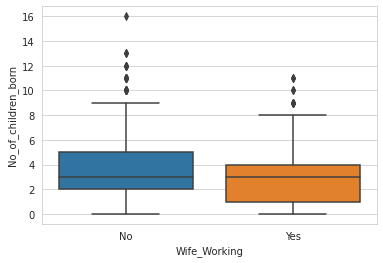

No_of_children_born,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,16.0,All
Wife_Working,,,,,,,,,,,,,,,,
No,49,189,195,188,140,98,70,38,40,11,9,9,4,2,1,1043
Yes,43,68,63,65,40,28,18,11,5,5,2,2,0,0,0,350
All,92,257,258,253,180,126,88,49,45,16,11,11,4,2,1,1393


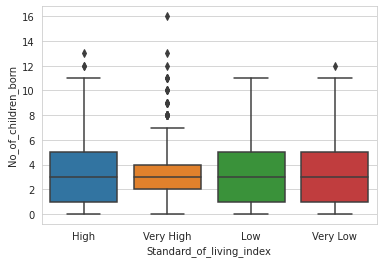

No_of_children_born,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,16.0,All
Standard_of_living_index,,,,,,,,,,,,,,,,
High,24,82,93,56,58,33,26,15,15,6,5,3,2,1,0,419
Low,19,42,38,35,29,24,18,6,9,2,2,3,0,0,0,227
Very High,38,103,108,140,80,59,37,23,14,5,4,4,1,1,1,618
Very Low,11,30,19,22,13,10,7,5,7,3,0,1,1,0,0,129
All,92,257,258,253,180,126,88,49,45,16,11,11,4,2,1,1393


Standard_of_living_index,High,Low,Very High,Very Low,All
Media_exposure,,,,,
Exposed,397,187,600,100,1284
Not-Exposed,22,40,18,29,109
All,419,227,618,129,1393


<AxesSubplot:xlabel='Wife_age', ylabel='No_of_children_born'>

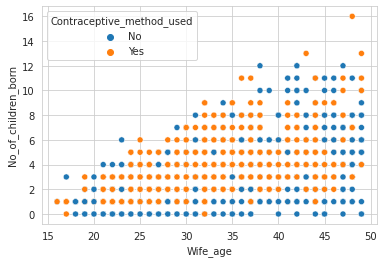

Standard_of_living_index         High  Low  Very High  Very Low   All
Wife_ education Wife_religion                                        
Primary         Non-Scientology     5    6         11         0    22
                Scientology        95   65         93        55   308
Secondary       Non-Scientology    14    4         32         2    52
                Scientology       120   77        114        35   346
Tertiary        Non-Scientology    24    4        100         2   130
                Scientology       116   34        229         6   385
Uneducated      Non-Scientology     1    1          0         1     3
                Scientology        44   36         39        28   147
All                               419  227        618       129  1393

Contraceptive_method_used         No  Yes   All
Wife_ education Wife_religion                  
Primary         Non-Scientology   11   11    22
                Scientology      163  145   308
Secondary       Non-Scientology   19   33    52
                Scientology      152  194   346
Tertiary        Non-Scientology   42   88   130
                Scientology      125  260   385
Uneducated      Non-Scientology    2    1     3
                Scientology      100   47   147
All                              614  779  1393

4    515
3    398
2    330
1    150
Name: Wife_ education, dtype: int64

4    827
3    347
2    175
1     44
Name: Husband_education, dtype: int64

Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64

4    618
3    419
2    227
1    129
Name: Standard_of_living_index, dtype: int64

Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64

1    779
0    614
Name: Contraceptive_method_used, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 152.0+ KB


,Wife_age,Wife_ education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Contraceptive_method_used,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure _Not-Exposed
0,24.0,2,3,3.0,2,3,0,1,0,0
1,45.0,1,3,10.0,3,4,0,1,0,0
2,43.0,2,3,7.0,3,4,0,1,0,0
3,42.0,3,2,9.0,3,3,0,1,0,0
4,36.0,3,3,8.0,3,2,0,1,0,0


1    779
0    614
Name: Contraceptive_method_used, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wife_age                     1393 non-null   float64
 1   Wife_ education              1393 non-null   int64  
 2   Husband_education            1393 non-null   int64  
 3   No_of_children_born          1393 non-null   float64
 4   Husband_Occupation           1393 non-null   int64  
 5   Standard_of_living_index     1393 non-null   int64  
 6   Contraceptive_method_used    1393 non-null   int64  
 7   Wife_religion_Scientology    1393 non-null   uint8  
 8   Wife_Working_Yes             1393 non-null   uint8  
 9   Media_exposure _Not-Exposed  1393 non-null   uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 123.4 KB


,count,mean,std,min,25%,50%,75%,max
Wife_age,1393.0,32.530510,8.088188,16.0,26.0,32.0,38.0,49.0
Wife_ education,1393.0,2.917444,1.015507,1.0,2.0,3.0,4.0,4.0
Husband_education,1393.0,3.404882,0.825965,1.0,3.0,4.0,4.0,4.0
No_of_children_born,1393.0,3.286432,2.381791,0.0,1.0,3.0,5.0,16.0
Husband_Occupation,1393.0,2.174444,0.854590,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1393.0,3.095477,0.984179,1.0,2.0,3.0,4.0,4.0
Contraceptive_method_used,1393.0,0.559225,0.496658,0.0,0.0,1.0,1.0,1.0
Wife_religion_Scientology,1393.0,0.851400,0.355822,0.0,1.0,1.0,1.0,1.0
Wife_Working_Yes,1393.0,0.251256,0.433891,0.0,0.0,0.0,1.0,1.0
Media_exposure _Not-Exposed,1393.0,0.078248,0.268658,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:xlabel='Wife_age'>

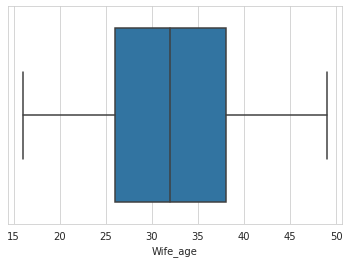

<AxesSubplot:xlabel='Wife_ education'>

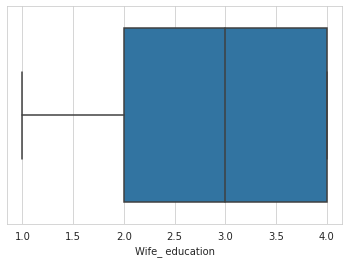

<AxesSubplot:xlabel='Husband_education'>

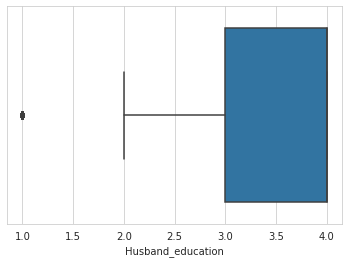

<AxesSubplot:xlabel='No_of_children_born'>

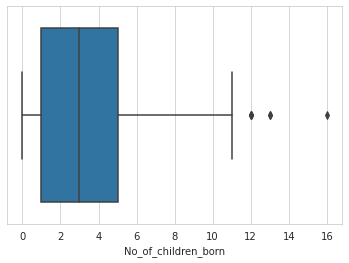

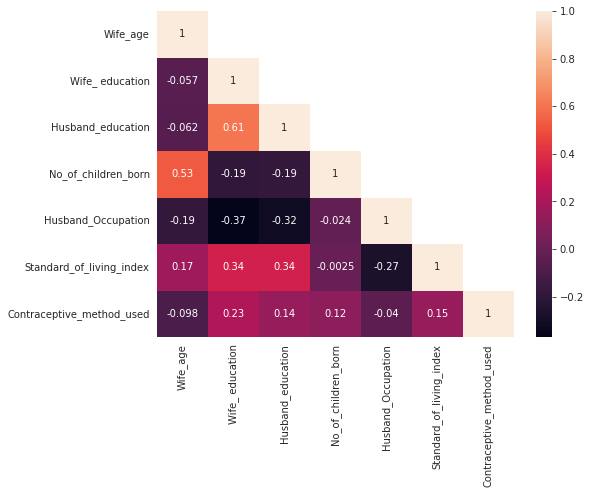

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure _Not-Exposed
336,34.0,4,3,0.0,3,3,0,1,0
781,37.0,4,4,3.0,2,4,1,0,0
433,37.0,4,4,2.0,3,3,1,1,0
588,29.0,4,4,2.0,3,4,1,0,0
468,24.0,1,4,1.0,4,2,1,1,1


1    553
0    422
Name: Contraceptive_method_used, dtype: int64

LogisticRegression()

0.7246535485032095

0.6584047750737463

[[223 199]
 [ 98 455]]
              precision    recall  f1-score   support

           0       0.69      0.53      0.60       422
           1       0.70      0.82      0.75       553

    accuracy                           0.70       975
   macro avg       0.70      0.68      0.68       975
weighted avg       0.70      0.70      0.69       975



(223, 199, 98, 455)

[[ 87 105]
 [ 50 176]]
              precision    recall  f1-score   support

           0       0.64      0.45      0.53       192
           1       0.63      0.78      0.69       226

    accuracy                           0.63       418
   macro avg       0.63      0.62      0.61       418
weighted avg       0.63      0.63      0.62       418



(87, 105, 50, 176)

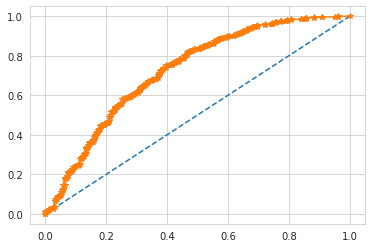

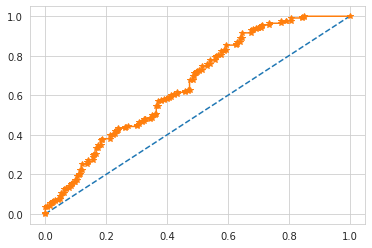

LinearDiscriminantAnalysis()

[[217 205]
 [ 95 458]]
              precision    recall  f1-score   support

           0       0.70      0.51      0.59       422
           1       0.69      0.83      0.75       553

    accuracy                           0.69       975
   macro avg       0.69      0.67      0.67       975
weighted avg       0.69      0.69      0.68       975



(217, 205, 95, 458)

[[ 82 110]
 [ 48 178]]
              precision    recall  f1-score   support

           0       0.63      0.43      0.51       192
           1       0.62      0.79      0.69       226

    accuracy                           0.62       418
   macro avg       0.62      0.61      0.60       418
weighted avg       0.62      0.62      0.61       418



(82, 110, 48, 178)

0.7236358338404052

0.6563997971976402

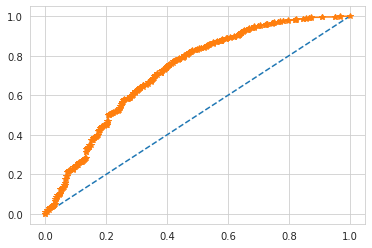

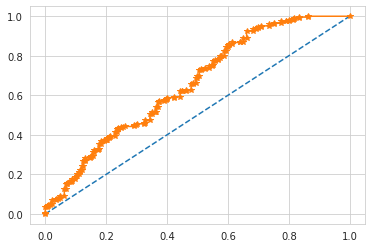

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

                                  Imp
Wife_age                     0.259989
Wife_ education              0.142921
Husband_education            0.044169
No_of_children_born          0.449977
Husband_Occupation           0.038074
Standard_of_living_index     0.026879
Wife_religion_Scientology    0.007681
Wife_Working_Yes             0.030310
Media_exposure _Not-Exposed  0.000000


0.8241903276398447

0.6985734697640118

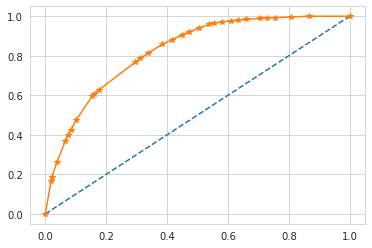

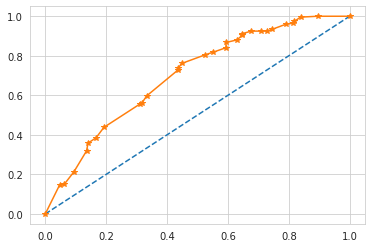

[[260 162]
 [ 79 474]]
              precision    recall  f1-score   support

           0       0.77      0.62      0.68       422
           1       0.75      0.86      0.80       553

    accuracy                           0.75       975
   macro avg       0.76      0.74      0.74       975
weighted avg       0.75      0.75      0.75       975



(260, 162, 79, 474)

[[ 91 101]
 [ 44 182]]
              precision    recall  f1-score   support

           0       0.67      0.47      0.56       192
           1       0.64      0.81      0.72       226

    accuracy                           0.65       418
   macro avg       0.66      0.64      0.64       418
weighted avg       0.66      0.65      0.64       418



(91, 101, 44, 182)